In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [113]:
#Load the dataset
df = pd.read_csv("onlycars.csv")

In [114]:
#Feature Engineering
df['Car_Age'] = 2025 - df['Year']   # Create car age column
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)  # Drop unused columns

In [115]:
#Encode Categorical Features
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [116]:
#Define Features (X) and Target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [117]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
#Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [119]:
#Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 0.72
R² Score: 0.9582


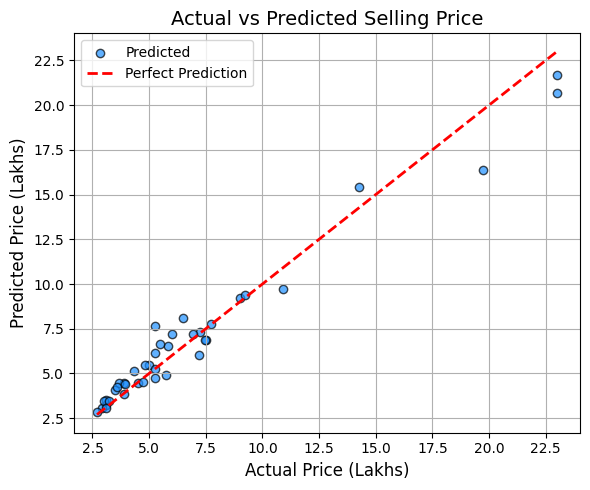

In [120]:
#Graph
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolors='k', alpha=0.7, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2, label="Perfect Prediction")
plt.title("Actual vs Predicted Selling Price", fontsize=14)
plt.xlabel("Actual Price (Lakhs)", fontsize=12)
plt.ylabel("Predicted Price (Lakhs)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()